In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [8]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
X = df['tenure']
Y = df['TotalCharges']

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

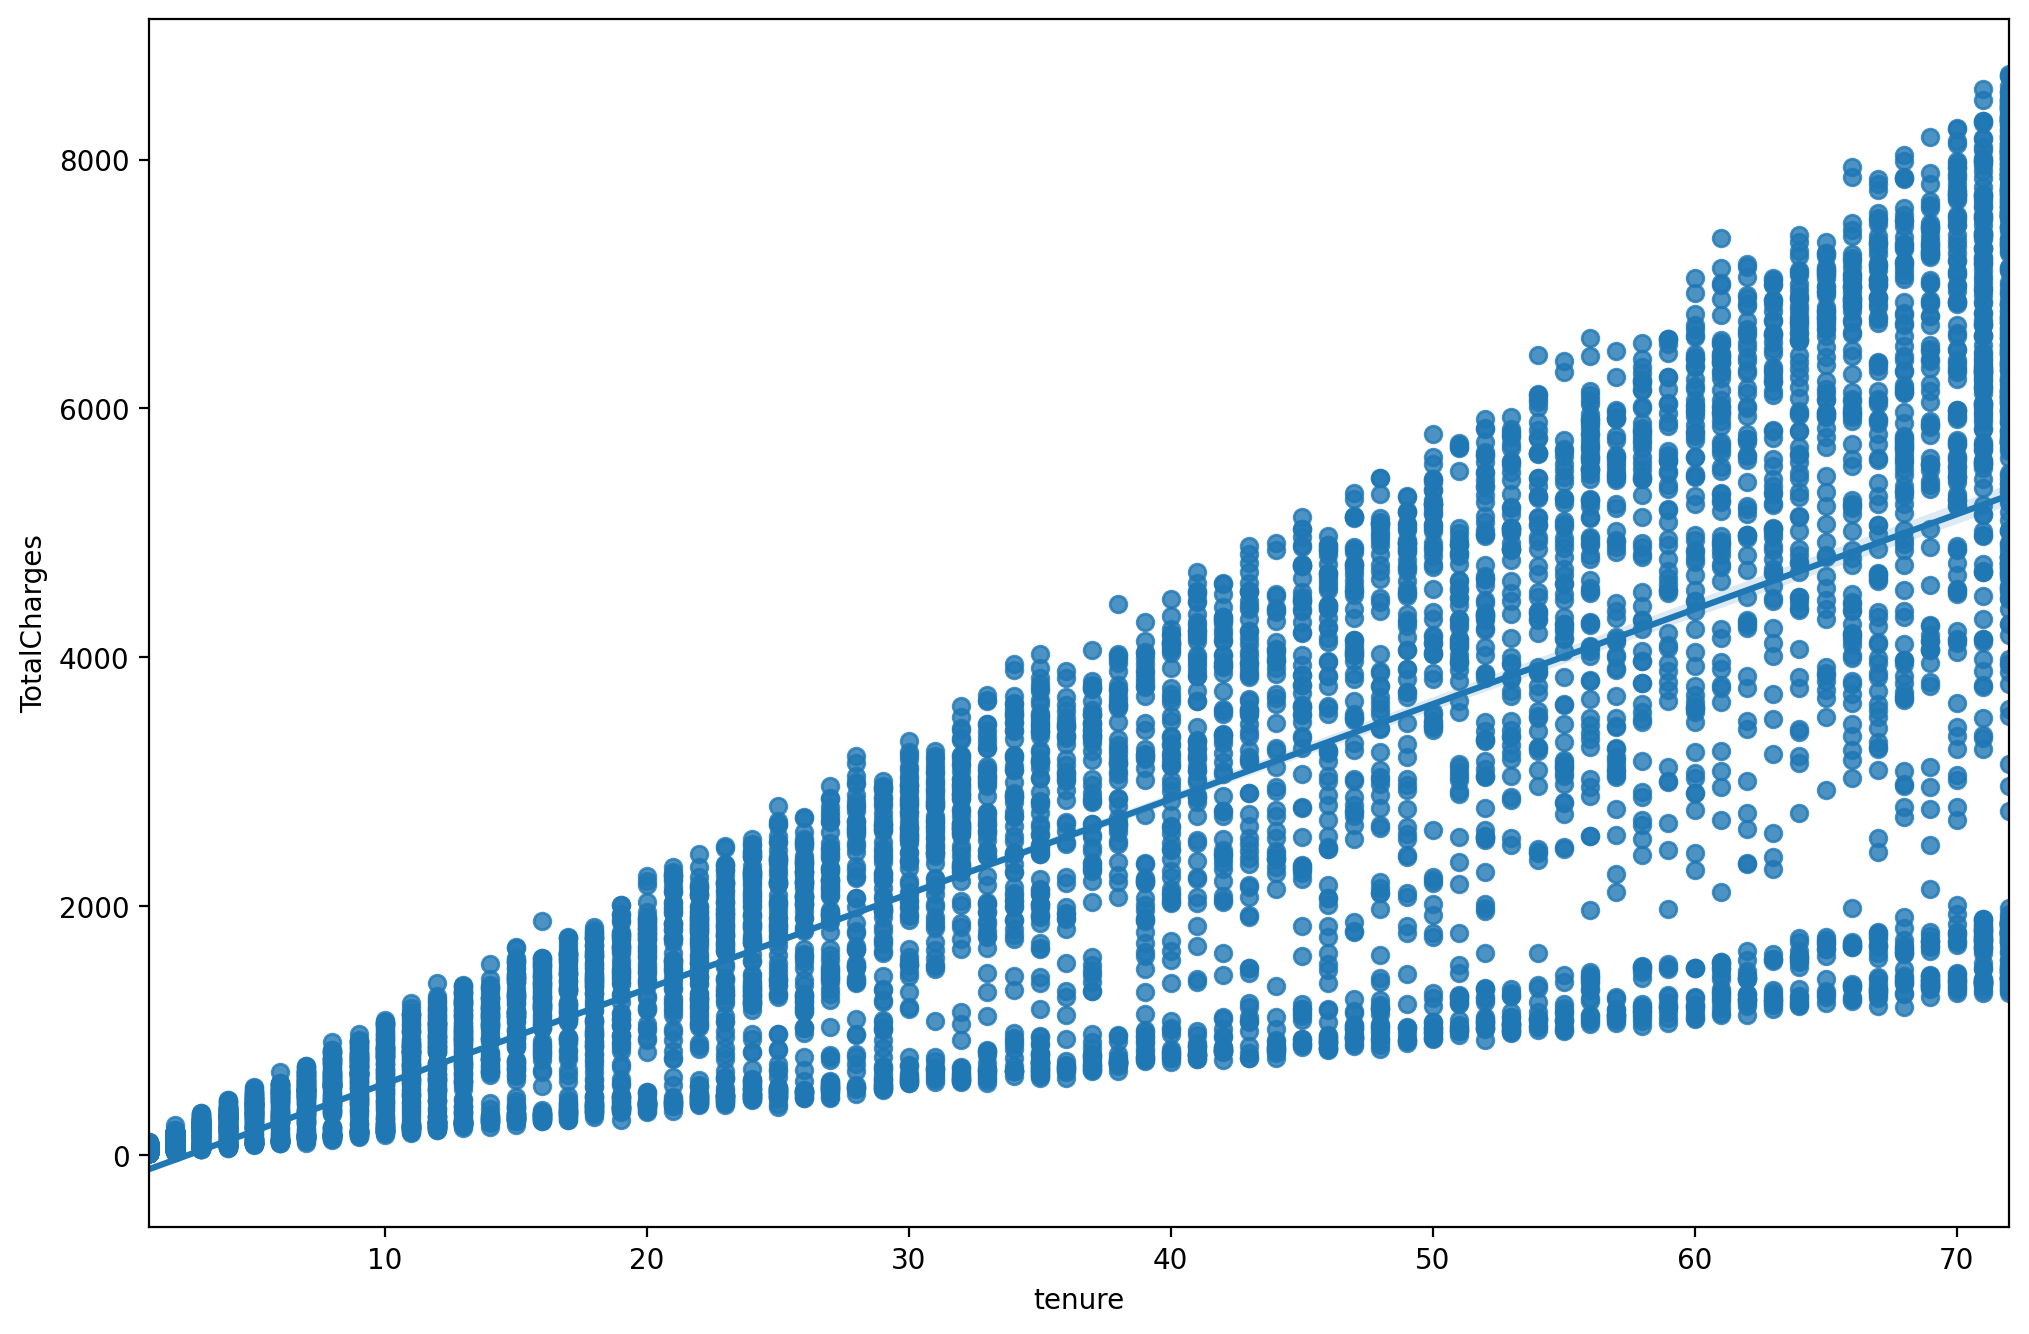

In [18]:
plt.figure(figsize=(12,8),dpi =200)
sns.regplot(data = df, x= X,y=Y)

In [20]:
from sklearn.model_selection import train_test_split

In [42]:
X =X.values.reshape(-1, 1)
Y =Y.values.reshape(-1,1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train,y_train)

LinearRegression()

In [49]:
test_predictions = model.predict(X_test)

In [50]:
test_predictions

array([[4438.59493809],
       [1260.07246858],
       [ 805.99783008],
       ...,
       [2849.33370333],
       [-102.15144692],
       [-102.15144692]])

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
df['TotalCharges'].mean()

2283.3004408418697

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

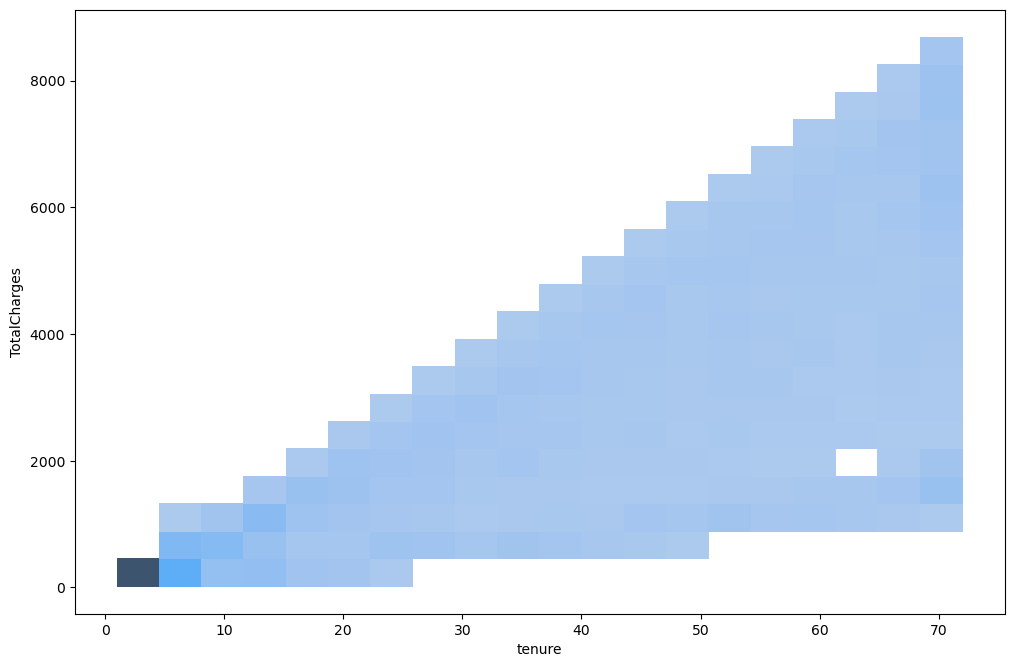

In [58]:
plt.figure(figsize=(12,8),dpi =100)
sns.histplot(data = df, x= 'tenure',bins=20,y='TotalCharges')

In [59]:
MAE = mean_absolute_error(y_test,test_predictions)

In [60]:
MAE

879.7899922582396

In [61]:
MSE = mean_squared_error(y_test,test_predictions)

In [62]:
MSE

1616687.4068986552

In [63]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [64]:
RMSE

1271.4902307523464

In [65]:
model.coef_

array([[75.67910642]])

In [66]:
model.intercept_

array([-177.83055334])

In [72]:
test_residuals = y_test- test_predictions

In [73]:
test_residuals

array([[-2936.84493809],
       [ -794.22246858],
       [  553.00216992],
       ...,
       [  166.41629667],
       [  122.45144692],
       [  121.45144692]])

NameError: name 'axhline' is not defined

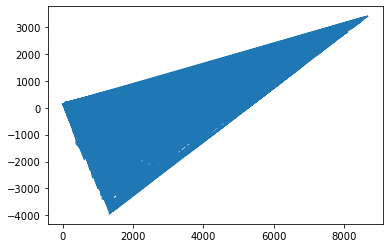

In [82]:
plt.plot(y_test,test_residuals)
